In [65]:
# 1. Understand the Problem

# Here we are predicting the slary from the uncleaned slary data
# Total 6 features / attributess are there
# The first five columns arr input features/independent variable
# The last column is salary . Output feature/dependent variable

# its a regression problem - accordingly we will be using ML algo rithm

In [66]:
#2 . collecting the data

# Program to mount the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Importing pandas library toload our csv dataset file
# It allows us to read ,  write and check the data set

import pandas as pd

In [68]:
filePath = "/content/drive/MyDrive/Machine learning/Uncleaned_SalaryData.csv"
df = pd.read_csv(filePath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [69]:
## 3.data cleaning (data understanding and cleaning process)

In [70]:
# shows the five last values
df.tail()  #Bydefault 5 rows
df.tail(3) # limit to 3 rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
387,29.0,MALE,masters,Director OF Operations,20.0,1200000.0
388,34.0,Unknown,Bachelors,JunIor project Manager,5.0,NaN
389,44.0,FEMALE,Phd,NaN,NaN,NaN


In [71]:
df.columns  # shows the column names

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [72]:
df.shape  # returns the shape of the data set

(390, 6)

In [73]:
df.info() # gives the data type details of file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  387 non-null    float64
 1   Gender               387 non-null    object 
 2   Education Level      387 non-null    object 
 3   Job Title            386 non-null    object 
 4   Years of Experience  385 non-null    float64
 5   Salary               384 non-null    float64
dtypes: float64(3), object(3)
memory usage: 18.4+ KB


In [74]:
df.describe() # statistics of numeric column

,Age,Years of Experience,Salary
count,387.000000,385.000000,3.840000e+02
mean,39.635659,10.050649,1.058993e+05
std,49.509188,6.896418,1.028712e+05
min,-5.000000,0.000000,-2.000000e+04
25%,31.000000,4.000000,5.500000e+04
50%,36.000000,9.000000,9.500000e+04
75%,44.000000,15.000000,1.400000e+05
max,1000.000000,50.000000,1.500000e+06


In [75]:
df['Age'].unique()

array([  32.,   28.,   45.,   36.,   52.,   29.,   42.,   31.,   26.,
         38.,   48.,   35.,   40.,   27.,   44.,   33.,   39.,   25.,
         51.,   34.,   47.,   30.,   41.,   37.,   24.,   43.,   50.,
         46.,   49.,   23.,   53.,   nan,   22.,   -5., 1000.])

In [76]:
df["Gender"].unique()

array(['Male', 'Female', nan, 'male', 'FEMALE', 'male ', 'femle',
       'female', 'MALE', 'Unknown'], dtype=object)

In [77]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan, 'Bachelors', 'Masters',
       'Phd', 'bachelor', 'masters'], dtype=object)

In [78]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [79]:
# data Cleaning
# checking the null value

df.isnull().sum()


,0
Age,3
Gender,3
Education Level,3
Job Title,4
Years of Experience,5
Salary,6


In [80]:
# the below syntax shows the null values row wise (axis =1) to represent rows
# NaN -  not a number (it wil be displayed for empty values)
df[pd.isnull(df).any(axis=1)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
379,28.0,femle,Master's,Manager,NaN,NaN
380,NaN,Male,NaN,manager,20.0,1500000.0
381,45.0,NaN,PhD,NaN,15.0,90000.0
386,43.0,female,Masters,Senior MaRketing Analyst,NaN,NaN
388,34.0,Unknown,Bachelors,JunIor project Manager,5.0,NaN
389,44.0,FEMALE,Phd,NaN,NaN,NaN


In [81]:
## How to handle the missing values
# mean
# works well for normally distributed numeric columns

# median
# Works well for skewed numeric column

# Mode
# for categorical data

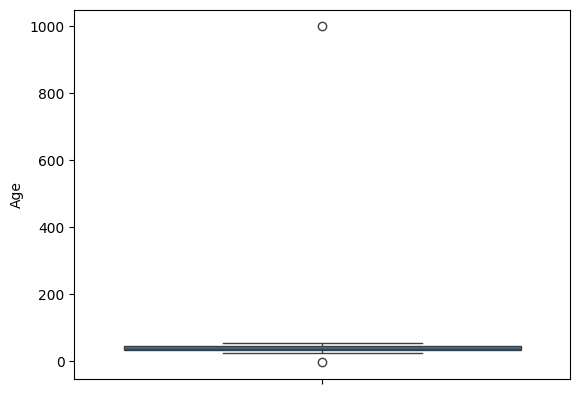

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# ploting the box plot ()
sns.boxplot(df['Age'])
plt.show()

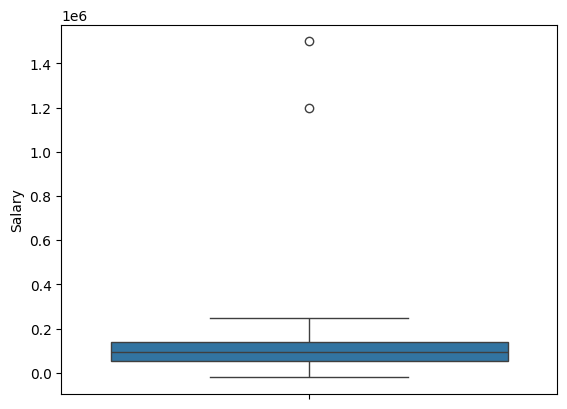

In [83]:
sns.boxplot(df['Salary'])
plt.show()

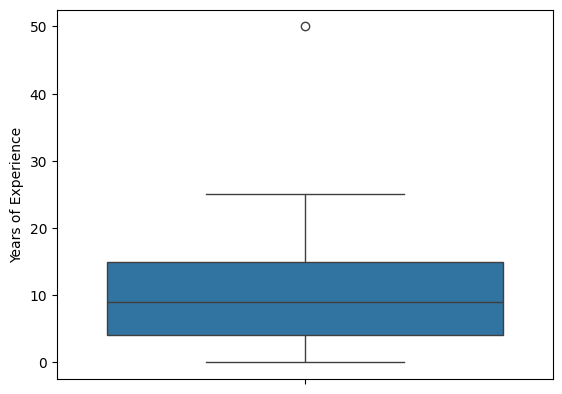

In [84]:
sns.boxplot(df['Years of Experience'])
plt.show()

In [85]:
# Above we have plotted box plot for numeric columns
# this helps us to identify outliers

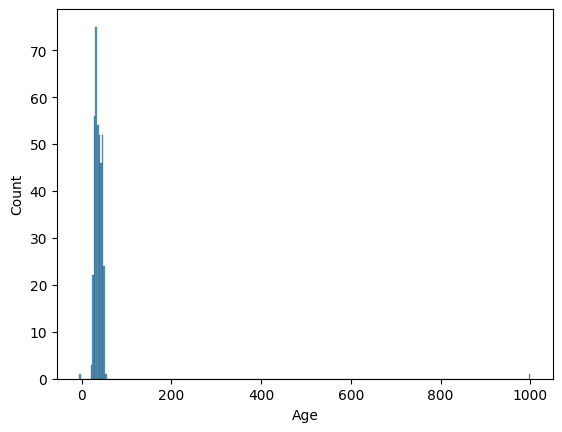

In [86]:
sns.histplot(df['Age'])
plt.show()

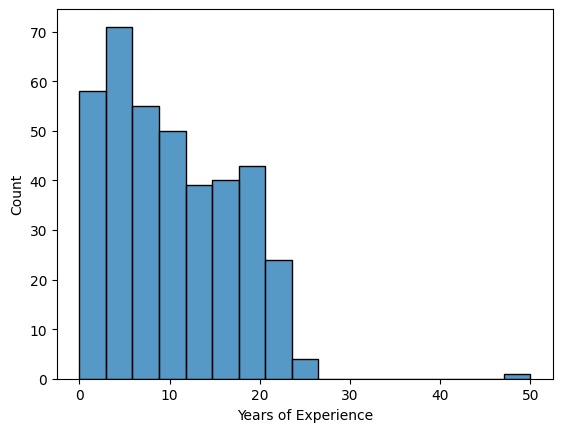

In [87]:
sns.histplot(df['Years of Experience'])
plt.show()

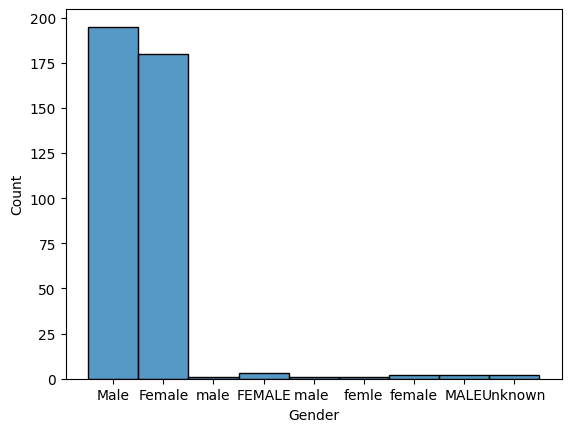

In [88]:

sns.histplot(df['Gender'])
plt.show()

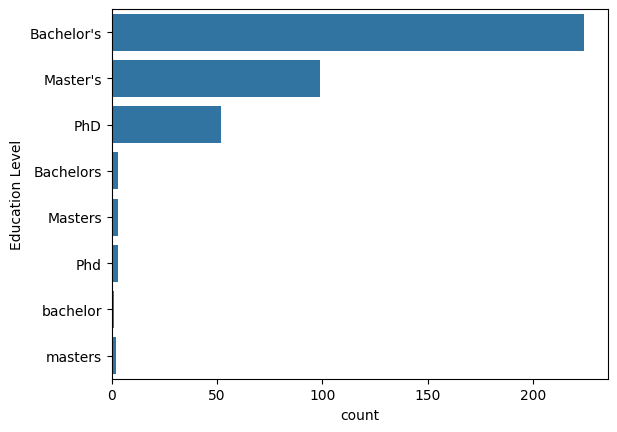

In [89]:
sns.countplot(df['Education Level'])
plt.show()

In [90]:
# Resolving the null values

df.isnull().sum()

,0
Age,3
Gender,3
Education Level,3
Job Title,4
Years of Experience,5
Salary,6


In [91]:
df=df.dropna()

In [92]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [93]:
df.shape

(382, 6)

In [94]:
df.duplicated().sum()

np.int64(50)

In [95]:
# Command to drop the duplicate values
#df.drop_duplicates(inplace=True)


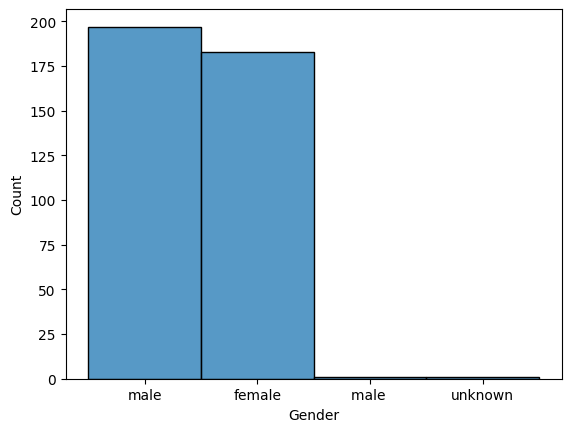

In [96]:
df['Gender']=df['Gender'].str.lower()
sns.histplot(df['Gender'])
plt.show()

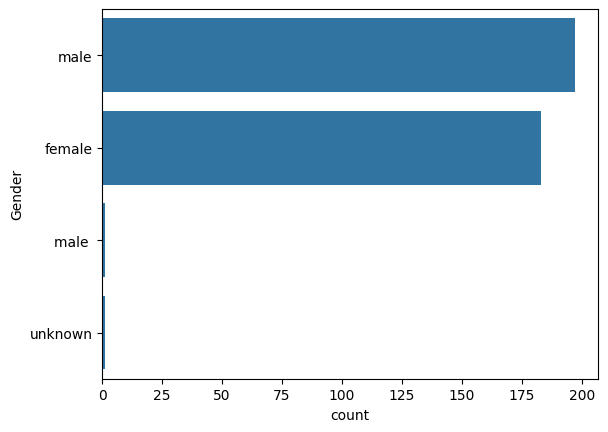

In [97]:
sns.countplot(df['Gender'])
plt.show()

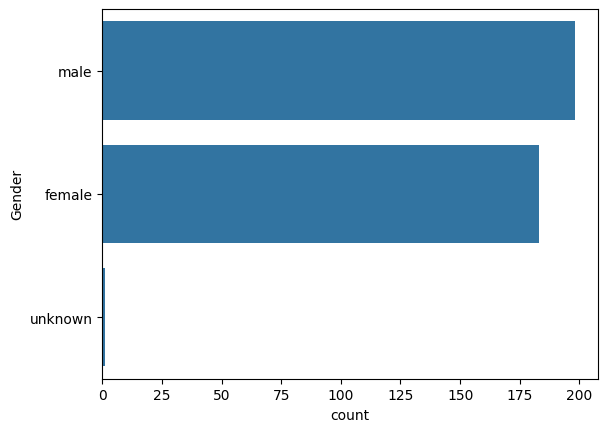

In [98]:
df['Gender']=df['Gender'].str.strip()
sns.countplot(df['Gender'])
plt.show()

In [99]:
gender_replace = {
    "femle:female"
    }
df["Gender"] = df["Gender"].replace(gender_replace)

/tmp/ipython-input-2842543264.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["Gender"] = df["Gender"].replace(gender_replace)


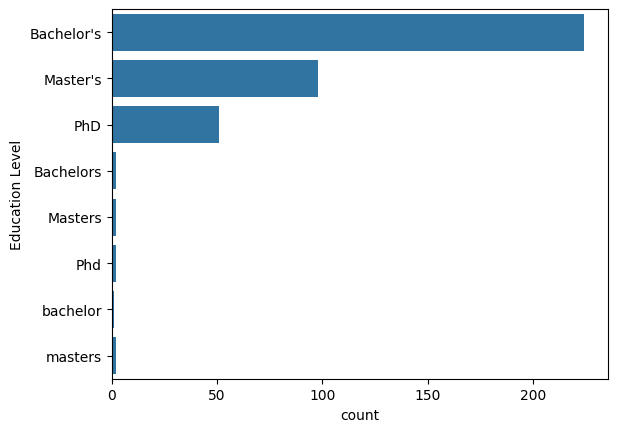

In [100]:
sns.countplot(df['Education Level'])
plt.show()

In [101]:
edu_replace = {
    "bachelor":"Bachelor's",
    "master":"Master's",
    "Phd":"PhD",
    "masters":"Master's",
    "bachelors":"Bachelor's",
    "Masters":"Master's",
    "MAster's" : "Master's",
    "Bachelors":"Bachelor's",

    }

df["Education Level"] = df["Education Level"].replace(edu_replace)


In [102]:
df.isnull()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
382,False,False,False,False,False,False
383,False,False,False,False,False,False
384,False,False,False,False,False,False
385,False,False,False,False,False,False


In [103]:
print(df.duplicated().sum())

50


In [104]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


# Data visualization

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

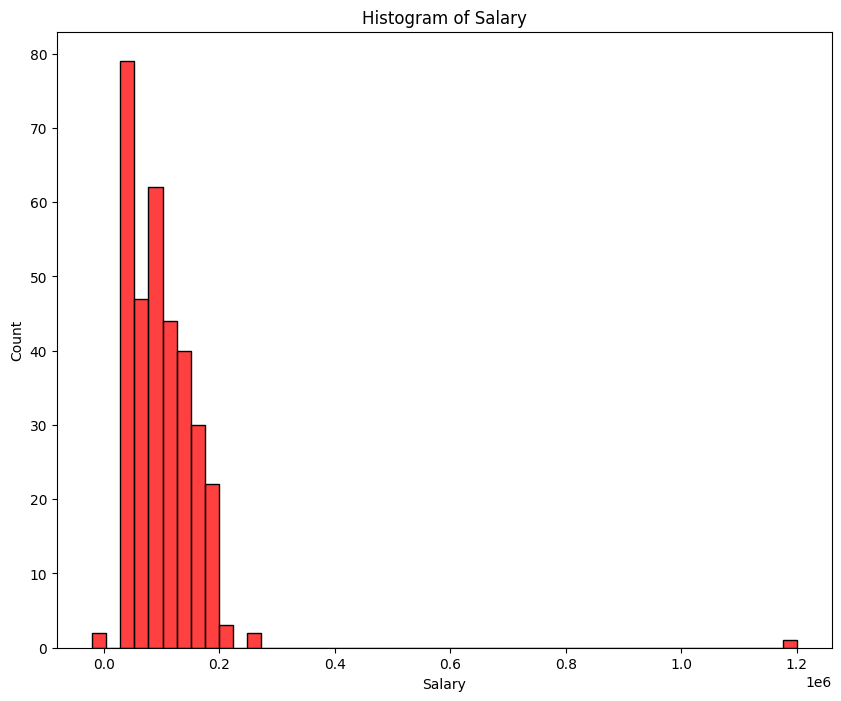

In [106]:

plt.figure(figsize=(10,8))
sns.histplot(df["Salary"],color="red") # Numeric column
plt.title("Histogram of Salary")
plt.show()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 387
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  332 non-null    float64
 1   Gender               332 non-null    object 
 2   Education Level      332 non-null    object 
 3   Job Title            332 non-null    object 
 4   Years of Experience  332 non-null    float64
 5   Salary               332 non-null    float64
dtypes: float64(3), object(3)
memory usage: 18.2+ KB


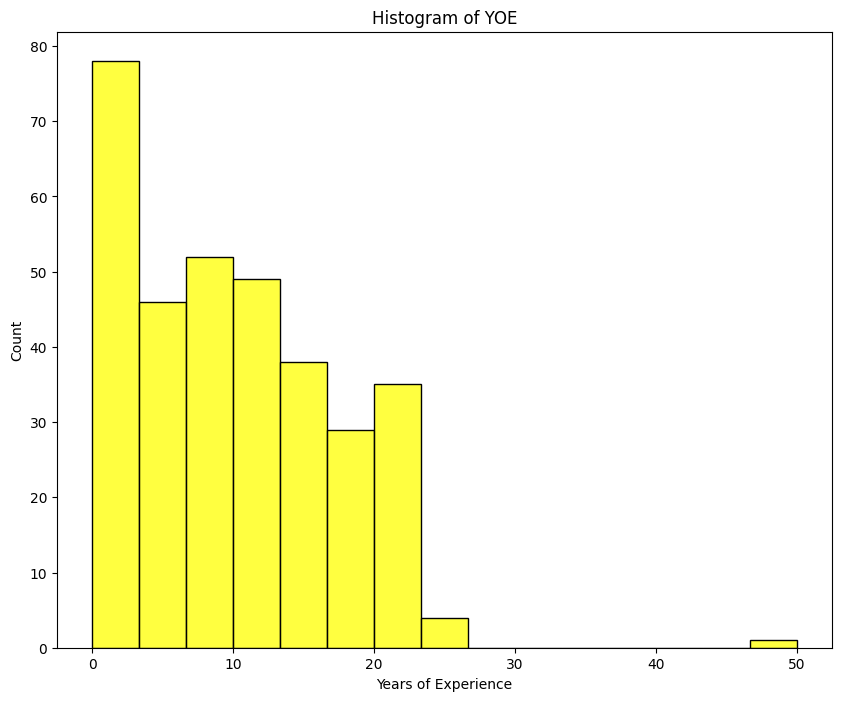

In [108]:
plt.figure(figsize=(10,8))
sns.histplot(df["Years of Experience"],color="Yellow") # Numeric column
plt.title("Histogram of YOE")
plt.show()

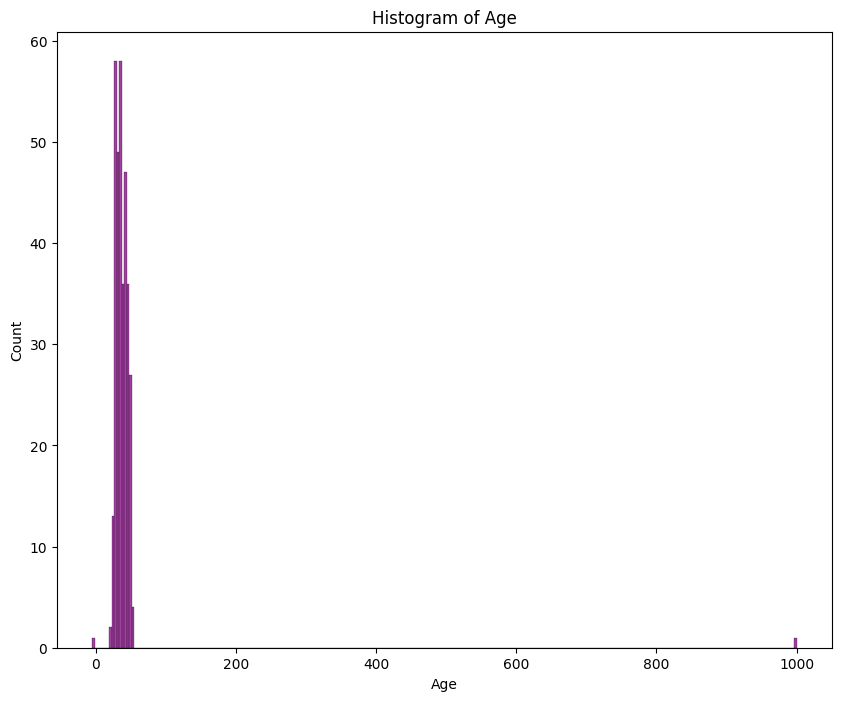

In [109]:
plt.figure(figsize=(10,8))
sns.histplot(df["Age"],color="Purple")
plt.title("Histogram of Age")
plt.show()

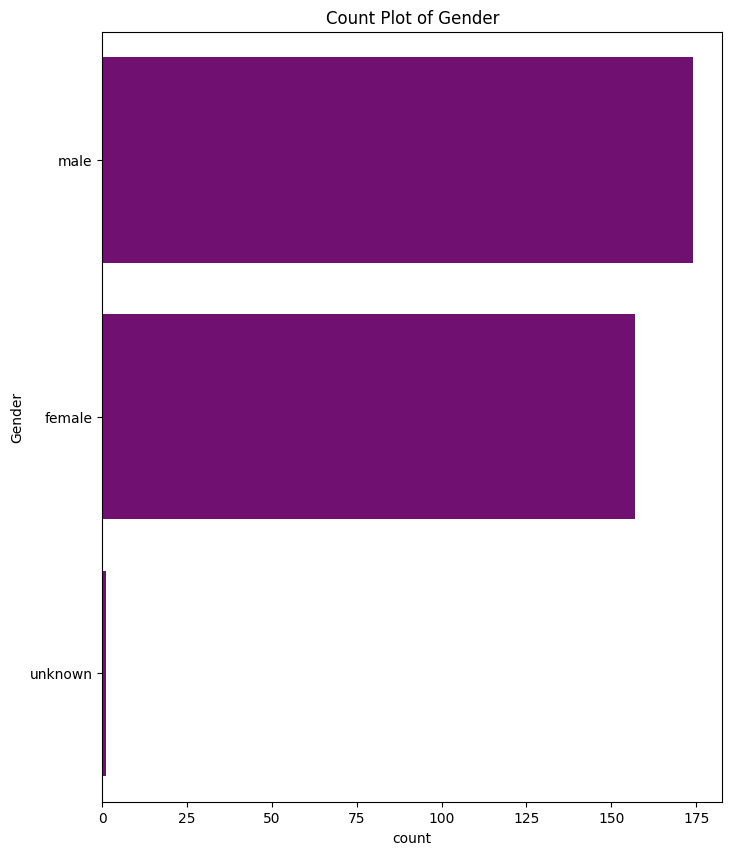

In [110]:
plt.figure(figsize=(8,10))
sns.countplot(df["Gender"],color="Purple") # Categorical data(text)
plt.title("Count Plot of Gender")
plt.show()

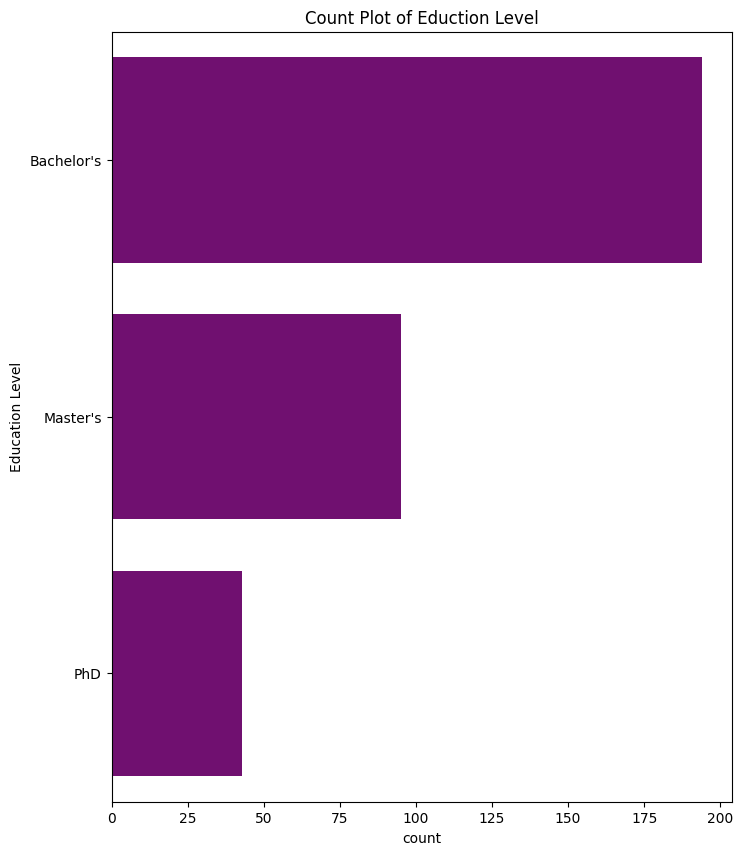

In [111]:
plt.figure(figsize=(8,10))
sns.countplot(df["Education Level"],color="Purple")
plt.title("Count Plot of Eduction Level")
plt.show()

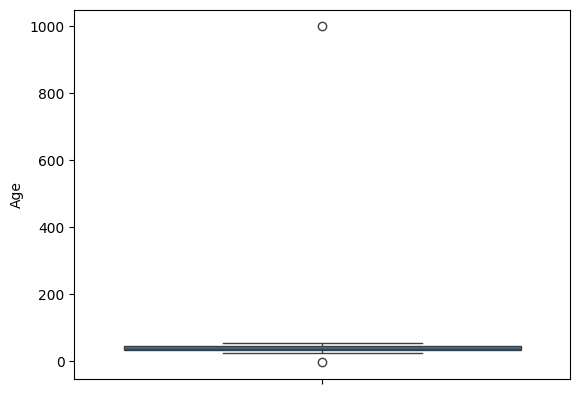

In [112]:
sns.boxplot(df['Age'])
plt.show()

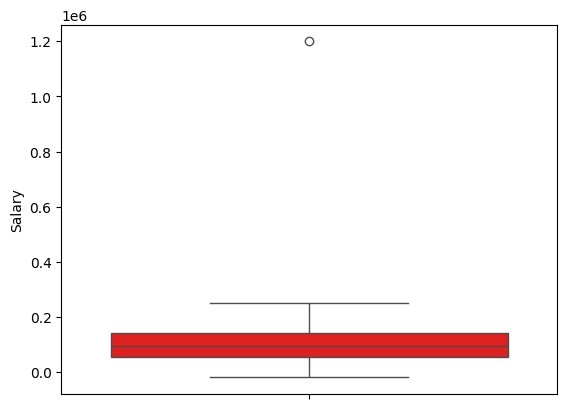

In [113]:
sns.boxplot(df['Salary'],color="red")
plt.show()

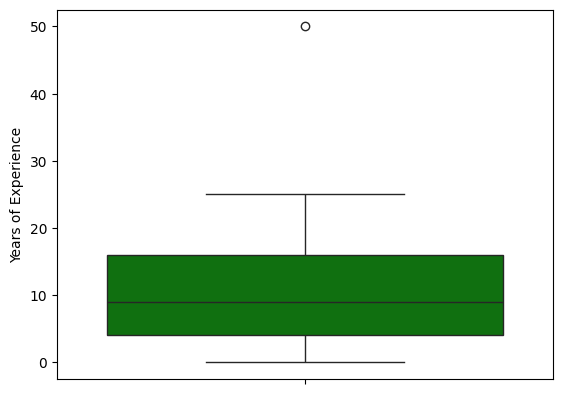

In [114]:
sns.boxplot(df['Years of Experience'],color="green")
plt.show()

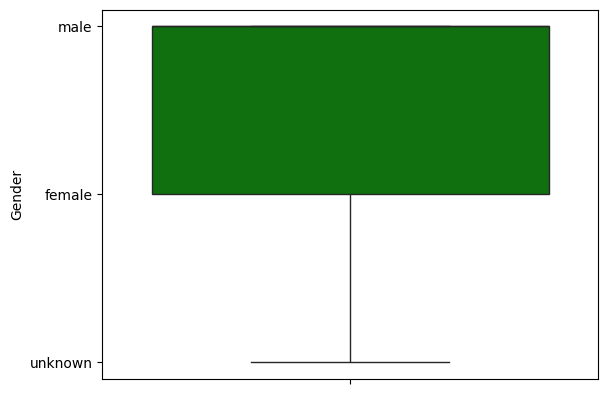

In [115]:
sns.boxplot(df['Gender'],color="green")
plt.show()

TypeError: 'str' object is not callable

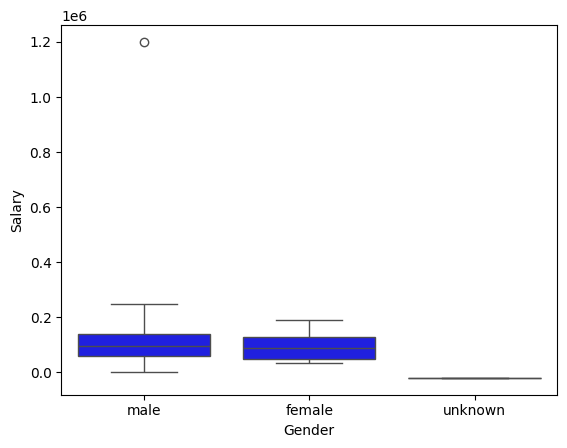

In [116]:
sns.boxplot(data=df,x="Gender",y="Salary",color="blue")
plt.xlabel("Gender of employee")
plt.ylabel("Salary of employee")
plt.title("Boxplot of Gender Vs Salary ")
plt.show()

In [ ]:
sns.boxplot(data=df,x="Education Level",y="Salary",color="Orange")
plt.xlabel="Education Level of Employee"
plt.ylabel="Salary of employee"
plt.title("Box plot of Education Level VS Salary")
plt.show()

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x="Years of Experience",y="Salary",color="blue")
plt.xlabel("Years of Experience of Employee")
plt.ylabel("Salary of Employee")
plt.title("Scatter plot of Years of Experience Vs Salary")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame to apply encoding for this specific visualization
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns
df_encoded["Gender"] = le.fit_transform(df_encoded["Gender"])
df_encoded["Education Level"] = le.fit_transform(df_encoded["Education Level"])
df_encoded["Job Title"] = le.fit_transform(df_encoded["Job Title"])

# Calculate and plot the heatmap using the encoded DataFrame
sns.heatmap(df_encoded.corr(), cmap="coolwarm") # Corrected cmap name
plt.show()

# label Encoding
# Preprocessing

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [120]:
df["Gender"] = le.fit_transform(df["Gender"])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 387
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  332 non-null    float64
 1   Gender               332 non-null    int64  
 2   Education Level      332 non-null    object 
 3   Job Title            332 non-null    object 
 4   Years of Experience  332 non-null    float64
 5   Salary               332 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 18.2+ KB


In [127]:
df["Education Level"] = le.fit_transform(df["Education Level"])
df["Job Title"] = le.fit_transform(df["Job Title"])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 387
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  332 non-null    float64
 1   Gender               332 non-null    int64  
 2   Education Level      332 non-null    int64  
 3   Job Title            332 non-null    int64  
 4   Years of Experience  332 non-null    float64
 5   Salary               332 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 18.2 KB


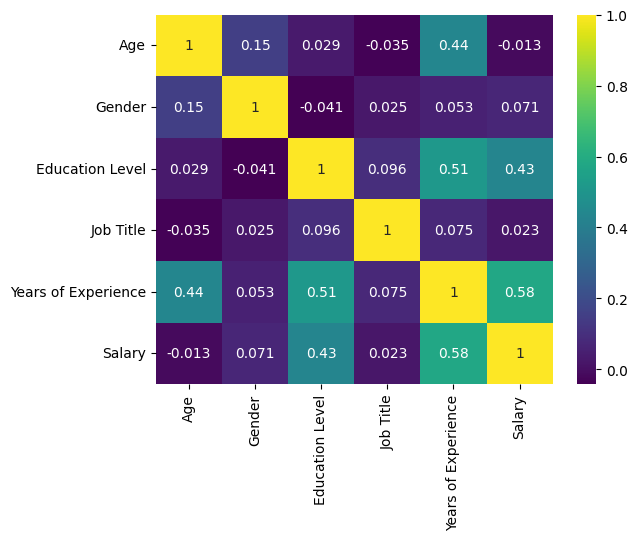

In [129]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 387
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  332 non-null    float64
 1   Gender               332 non-null    int64  
 2   Education Level      332 non-null    int64  
 3   Job Title            332 non-null    int64  
 4   Years of Experience  332 non-null    float64
 5   Salary               332 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 18.2 KB


In [131]:
df['Age'].unique()

array([  32.,   28.,   45.,   36.,   52.,   29.,   42.,   31.,   26.,
         38.,   48.,   35.,   40.,   27.,   44.,   33.,   39.,   25.,
         51.,   34.,   47.,   30.,   41.,   37.,   24.,   43.,   50.,
         46.,   49.,   23.,   53.,   22.,   -5., 1000.])

In [132]:
df=df[(df['Age']>=18) & (df['Age']<=60)]

In [133]:
df['Age'].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., 22.])

<Axes: xlabel='Age', ylabel='Count'>

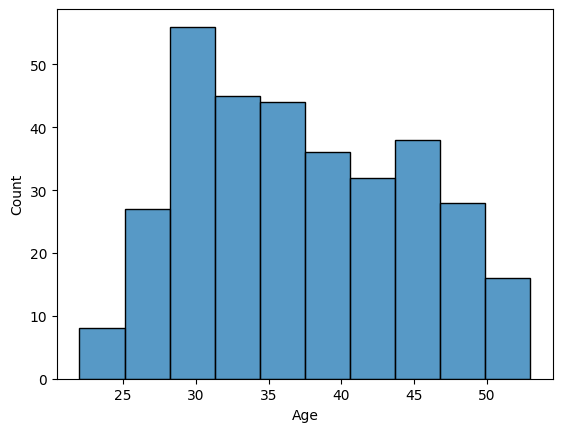

In [134]:
sns.histplot(df['Age'])

In [135]:
df.skew(numeric_only=True) # -1 onwards and 1. onwards

,0
Age,0.201291
Gender,-0.097528
Education Level,0.912092
Job Title,-0.109020
Years of Experience,0.369867
Salary,8.712854


In [136]:
# Splitting Data in to x and y
# x = features
x = df.drop("Salary",axis = 1)

# y = Tagrget variable
y = df["Salary"]

In [137]:
x.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'], dtype='object')

In [138]:
# Splitting data in to training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Model Selection


In [139]:
# linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [140]:
y_pred_lr = lr.predict(x_test)

In [141]:
# for regression R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_lr)
print("r2 score is ",r2)

r2 score is  0.4714247161790631


Decision tree regression

In [142]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred_dtr = dtr.predict(x_test)

r2_dtr= r2_score(y_test,y_pred_dtr)
print("r2 score is ",r2_dtr)

r2 score is  0.8898499748761755


In [143]:
# random forest regressor (Ensemble)
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred_rfr = rfr.predict(x_test)

r2_rfr= r2_score(y_test,y_pred_rfr)
print("r2 score is ",r2_rfr)

r2 score is  0.934013488099288


In [144]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred_rfr)
print("Mean absolute error is ",mae)

Mean absolute error is  8051.142676767676


In [145]:
# XGBoost regression
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

y_pred_xgbr = xgbr.predict(x_test)

r2_xgbr= r2_score(y_test,y_pred_xgbr)
print("r2 score is ",r2_xgbr)

r2 score is  0.9240847415077554


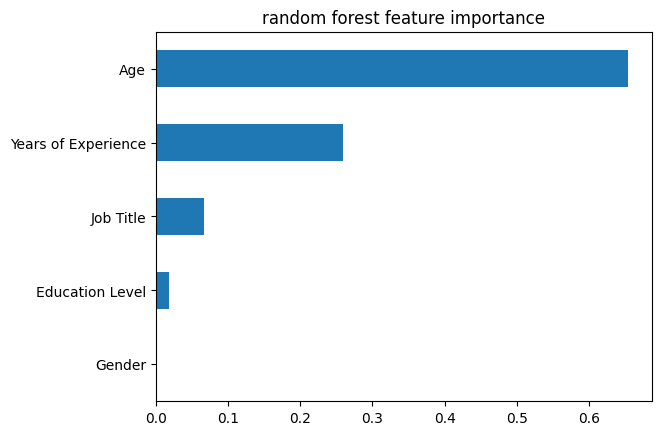

In [146]:
importance = pd.Series(rfr.feature_importances_,index=x.columns)

importance.sort_values().plot(kind="barh",title="random forest feature importance")

plt.show()

In [147]:
import joblib

In [148]:
joblib.dump(rfr,"salary_prediction_model.pkl")

['salary_prediction_model.pkl']

In [150]:
from google.colab import files
files.download("salary_prediction_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>